# Credit Card Defaulter prediction

###### Objective: Is to predict which customer might default in upcoming months. Before going any further let's have a quick look on defination of what actually meant by Credit Card Default.

- Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.

- So now we know what a credit card is. Now let's see one of problems faced by companies who provide credit cards. Yes it is the peolpe who do not clear off the credit card debt aka credit card defaulters.


## Description of columns from dataset documentation
There are 25 variables:
-  ID: ID of each client
-  LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
-  SEX: Gender (1=male, 2=female)
-  EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
-  MARRIAGE: Marital status (1=married, 2=single, 3=others)
-  AGE: Age in years
-  PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, …    8=payment delay for eight months, 9=payment delay for nine months and above)
-  PAY_2: Repayment status in August, 2005 (scale same as above)
-  PAY_3: Repayment status in July, 2005 (scale same as above)
-  PAY_4: Repayment status in June, 2005 (scale same as above)
-  PAY_5: Repayment status in May, 2005 (scale same as above)
-  PAY_6: Repayment status in April, 2005 (scale same as above)
-  BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
-  BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
-  BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
-  BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
-  BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
-  BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
-  PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
-  PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
-  PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
-  PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
-  PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
-  PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
-  default.payment.next.month: Default payment (1=yes, 0=no)

## Importing necessary liabraries and model techniques

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

## Loading the Dataset

In [2]:
df1 = pd.read_csv("UCI_Credit_Card.csv")
df1.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [3]:
df1.shape

(30000, 25)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
df1.describe() #stats description

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df1.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
df1.duplicated().any()

False

In [8]:
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [9]:
# Renaming the target column for better reference. and changing PAY_0 to PAY_1.
df1.rename(columns={"default.payment.next.month" : "default", "PAY_0":"PAY_1"}, inplace=True)
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [10]:
# Count in diff categorical columns
for columns in ["SEX","EDUCATION","MARRIAGE"]:
    print(df1[columns].value_counts())
    print("", end="\n")
    

2    18112
1    11888
Name: SEX, dtype: int64

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64



In [11]:
df1.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

#### Default : 1 - Yes, 0 - No

In [12]:
df1["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

#### Gender : 1 - Male , 2 - Female

In [13]:
df1.groupby("default")["SEX"].value_counts(ascending=True)

default  SEX
0        1       9015
         2      14349
1        1       2873
         2       3763
Name: SEX, dtype: int64

#### Females are defaulting more than the Males

In [14]:
plt.rcParams["figure.figsize"]=(10,6)

In [15]:
def plot_vis(col):
    sns.countplot(x = col, hue=df1.default)

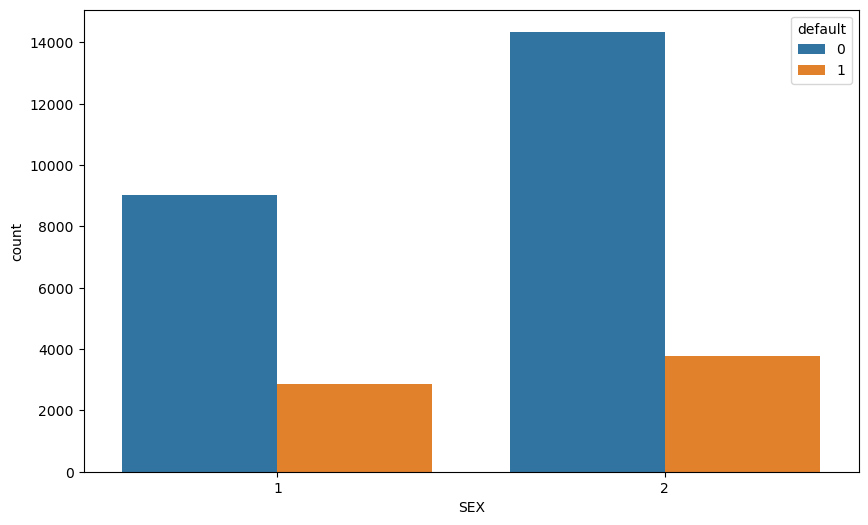

In [16]:
plot_vis(df1.SEX)

In [17]:
df1.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

#### Education has 7 categories where 1,2,3 are having most of the data points and remaining 0,5,6 can be merged into value 4.

In [18]:
df1.loc[(df1["EDUCATION"]==5)| (df1["EDUCATION"]==6) |(df1["EDUCATION"]==0),"EDUCATION"] = 4
df1.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

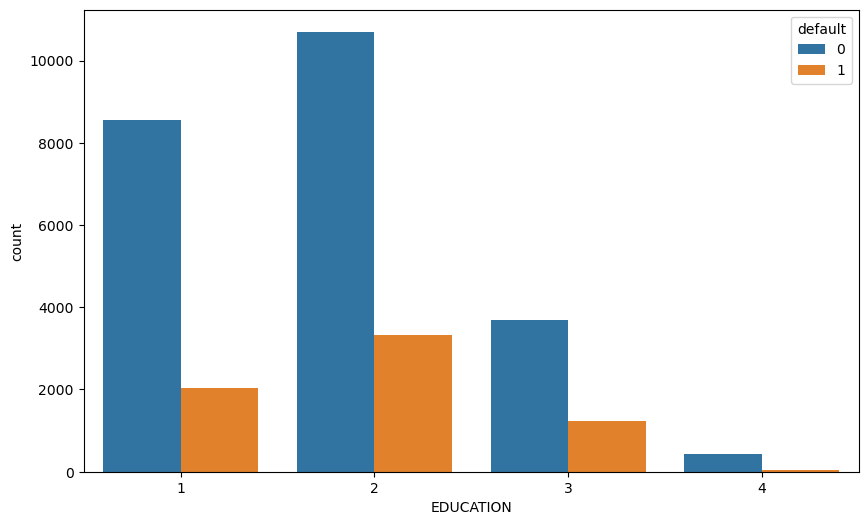

In [19]:
plot_vis(df1.EDUCATION)

#### 1 = Graduate School, 2 = University, 3 = High School, 4 = Others

#### People having university level education are defaulting more than others. But peope with High School level education have higher ratio of default against availment. 

In [20]:
df1.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [21]:
df1.loc[df1.MARRIAGE==0, "MARRIAGE"] = 3
df1.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

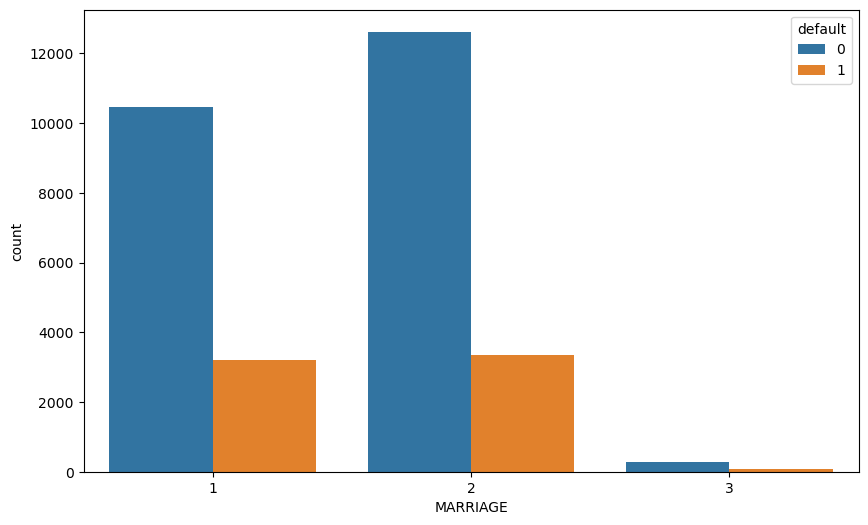

In [22]:
plot_vis(df1.MARRIAGE)

#### 1 = Married, 2 = Single, 3 = Others

In [23]:
for columns in df1.columns:
    print(columns," : ", df1[columns].nunique())

ID  :  30000
LIMIT_BAL  :  81
SEX  :  2
EDUCATION  :  4
MARRIAGE  :  3
AGE  :  56
PAY_1  :  11
PAY_2  :  11
PAY_3  :  11
PAY_4  :  11
PAY_5  :  10
PAY_6  :  10
BILL_AMT1  :  22723
BILL_AMT2  :  22346
BILL_AMT3  :  22026
BILL_AMT4  :  21548
BILL_AMT5  :  21010
BILL_AMT6  :  20604
PAY_AMT1  :  7943
PAY_AMT2  :  7899
PAY_AMT3  :  7518
PAY_AMT4  :  6937
PAY_AMT5  :  6897
PAY_AMT6  :  6939
default  :  2


#### Here "SEX", "EDUCATION", "MARRIAGE","PAY_1 TO PAY_6" are Categorical Columns and rest are Numerical columns.

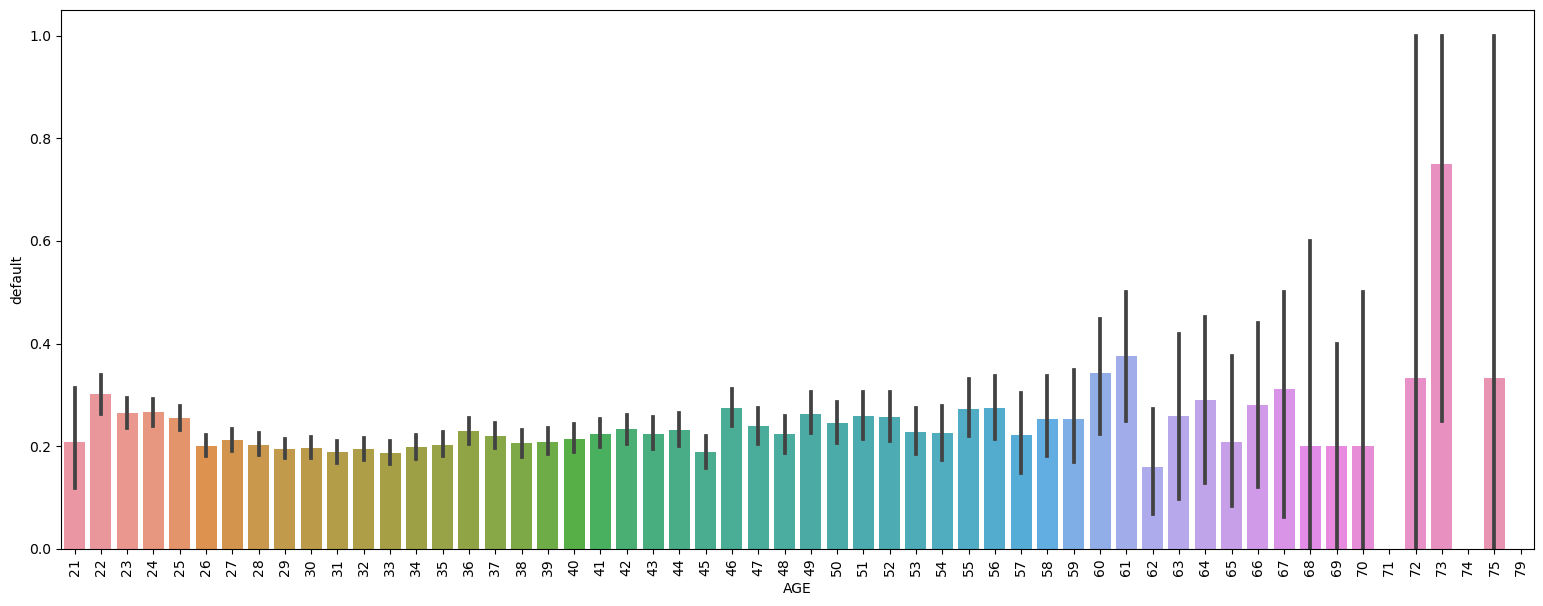

In [24]:
#plotting the bar plot to vizualize the data distribution related to the default_payment_next_month
plt.figure(figsize=(19,7))
sns.barplot(x = 'AGE', y = 'default', data = df1) 
plt.xticks(rotation=90)

plt.show()

In [25]:
cat_columns = []
num_columns = []

for columns in df1.columns:
    if df1[columns].nunique()<12:
        cat_columns.append(columns)
    else:
        num_columns.append(columns)
    
print("Categorical Columns Are : ", cat_columns)
print("Numerical Columns Are : ", num_columns)
        

Categorical Columns Are :  ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default']
Numerical Columns Are :  ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [26]:
num_columns.remove("ID")
cat_columns.remove("default")

print("Categorical Columns Are : ", cat_columns)
print("Numerical Columns Are : ", num_columns)

Categorical Columns Are :  ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
Numerical Columns Are :  ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


## EDA For Numerical Columns

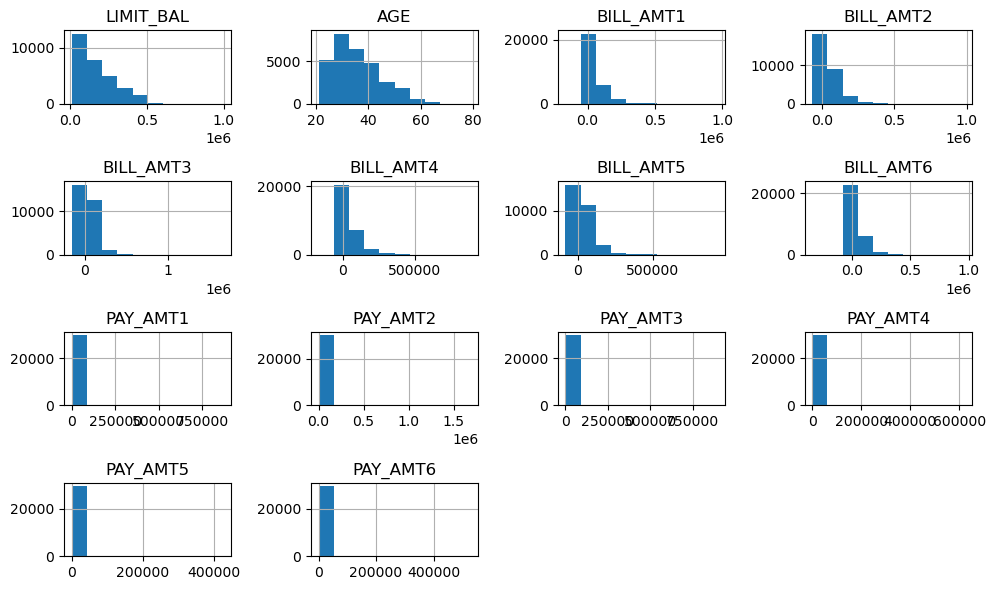

In [27]:
df1[num_columns].hist()
plt.tight_layout()
plt.show()

In [28]:
def sub_plots_num(col):
    plt.subplot(1,2,1)
    sns.histplot(x=col, hue = df1["default"])
    
    plt.subplot(1,2,2)
    sns.boxplot(y=col, x=df1["default"])

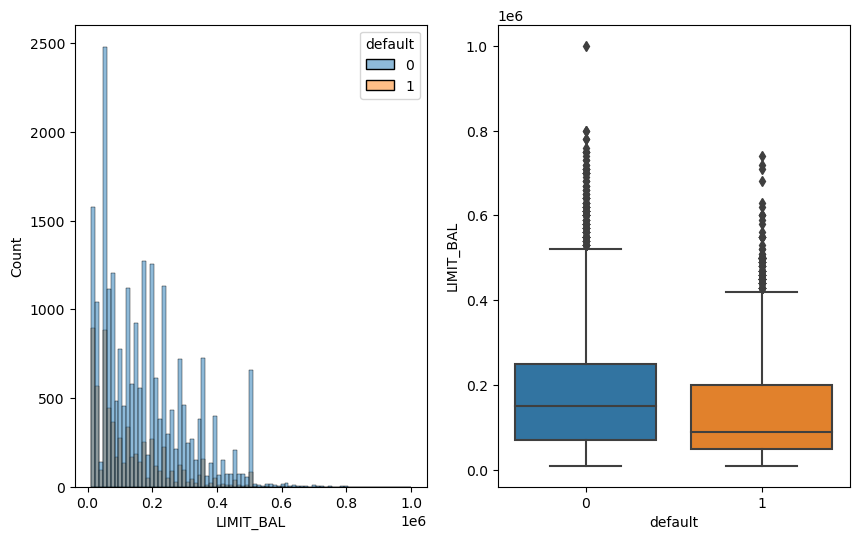

In [29]:
sub_plots_num(df1["LIMIT_BAL"])

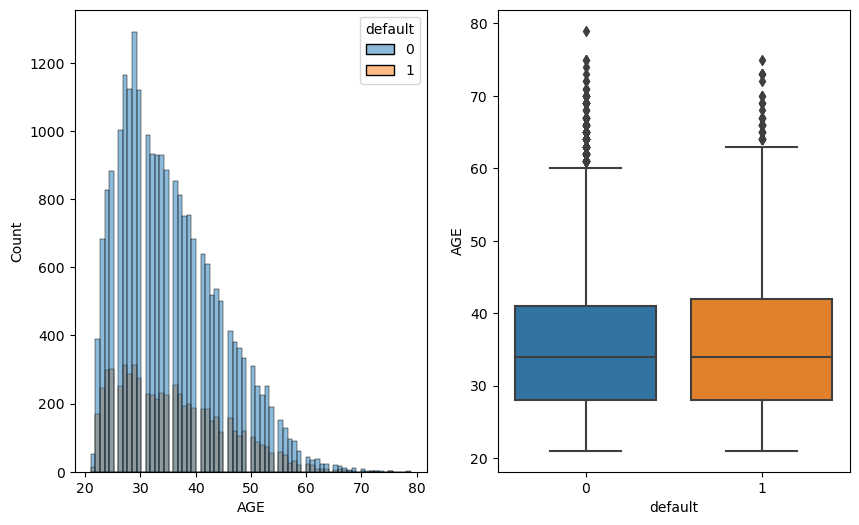

In [30]:
sub_plots_num(df1["AGE"])

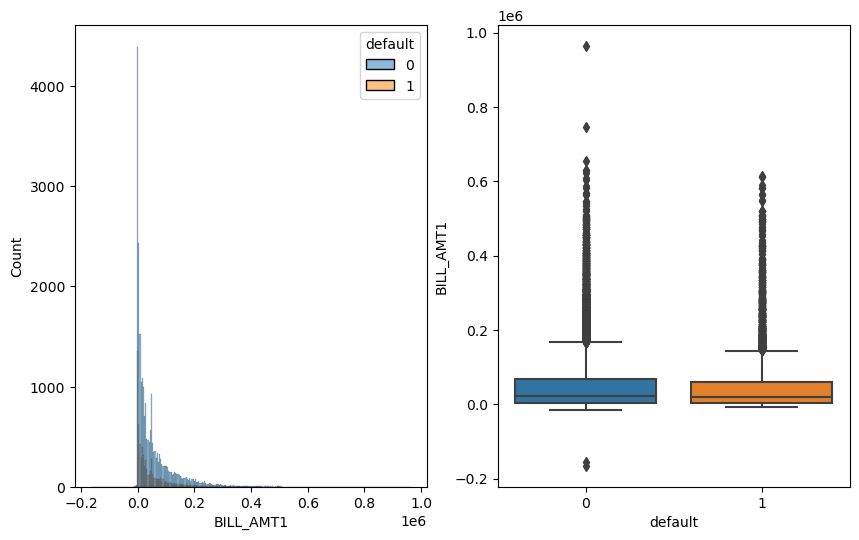

In [31]:
sub_plots_num(df1["BILL_AMT1"])

#### Bill Amount for the remaining months follow the same Pattern.

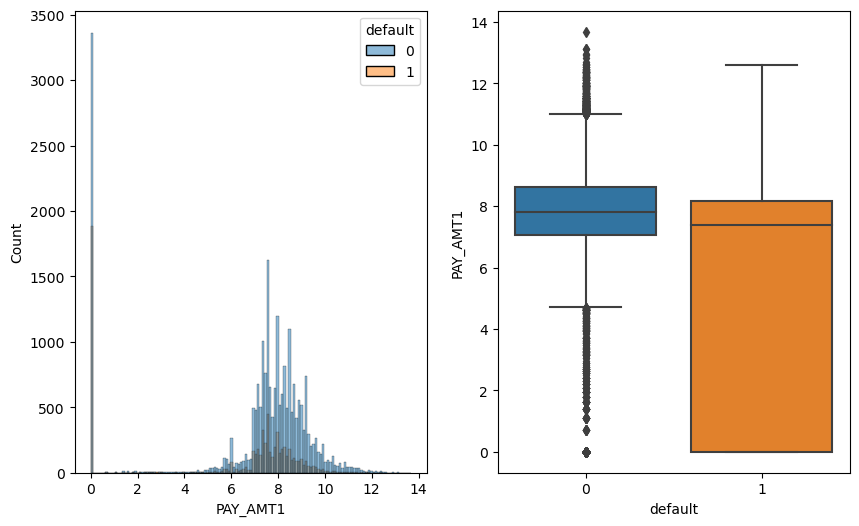

In [32]:
sub_plots_num(np.log1p(df1["PAY_AMT1"]))

#### Amount Pay follows similar patter like the "PAY_AMT1"

## EDA For Categorical Columns

In [33]:
cat_columns

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [34]:
def plot_cat_columns(col):
    pie_val = df1.groupby(col)["default"].mean()
    
    plt.subplot(1,2,1)
    sns.countplot(x=col, data=df1)
    
    plt.subplot(1,2,2)
    plt.pie(pie_val, autopct= "%0.1f%%", labels = pie_val.index)

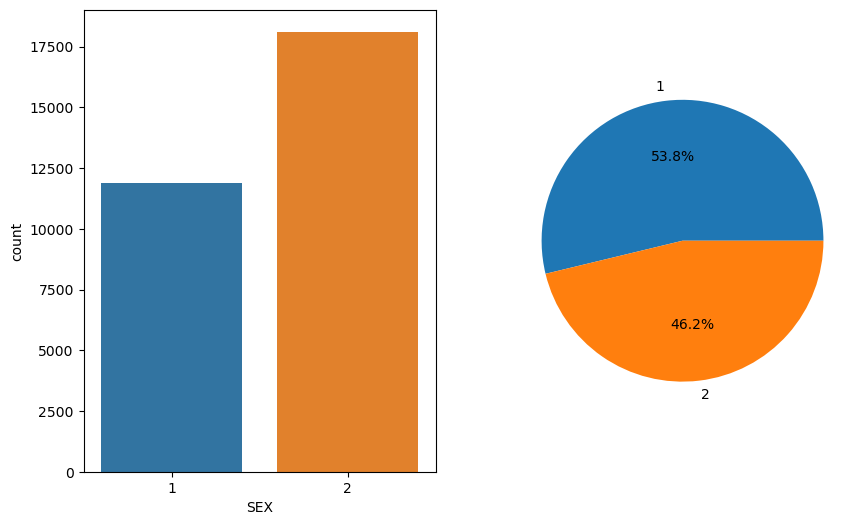

In [35]:
plot_cat_columns("SEX")

#### Female have higher chances of default than Male.

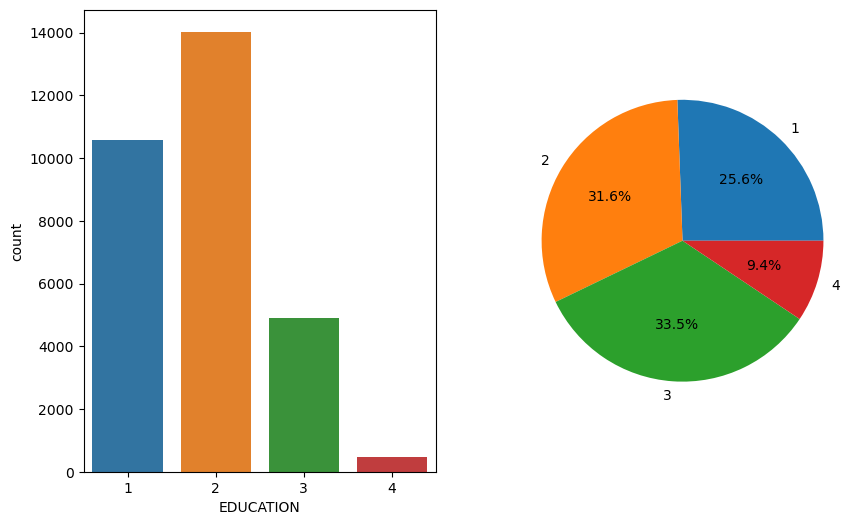

In [36]:
plot_cat_columns("EDUCATION")

#### Although the number of defaulters are higher in people having University level education but the people having High School education have higher chances of deafult.

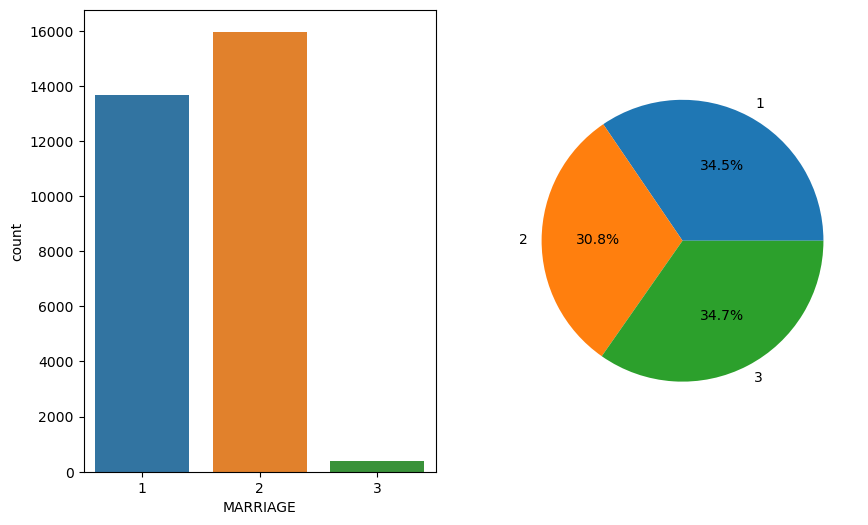

In [37]:
plot_cat_columns("MARRIAGE")

#### Single people have less chances of default than Married and others.

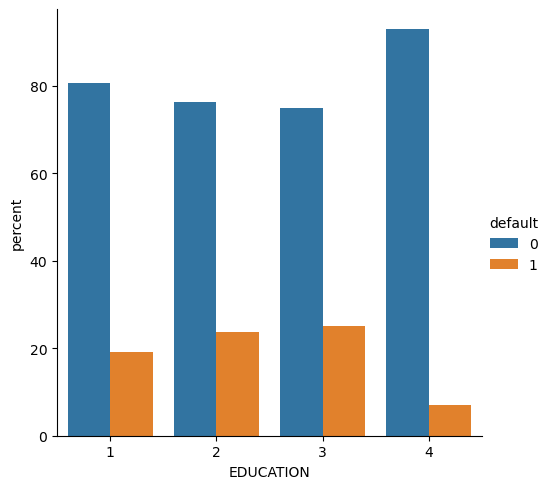

In [38]:
#plotting the cat plot to vizualize the data distribution related to the default_payment_next_month
x,y = 'EDUCATION', 'default'

(df1
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

 - High defaulter rate when it comes to others.

## Age and default

In [39]:
for i in range(1,7):
    col = "PAY_"+str(i)
    #print(col)
    df1.loc[(df1[col]==-2) | (df1[col] ==-1), col] =0

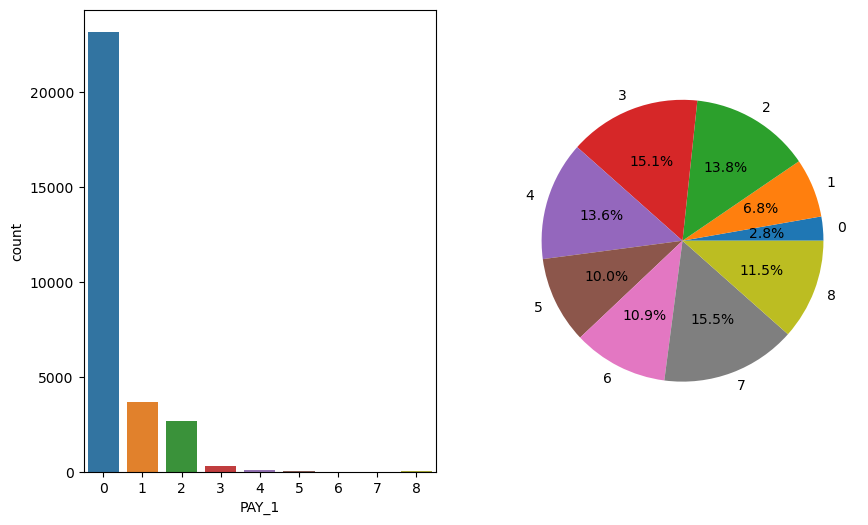

In [40]:
plot_cat_columns("PAY_1")

#### As the repayment gets delayed by 1 month, the chances of default increase.

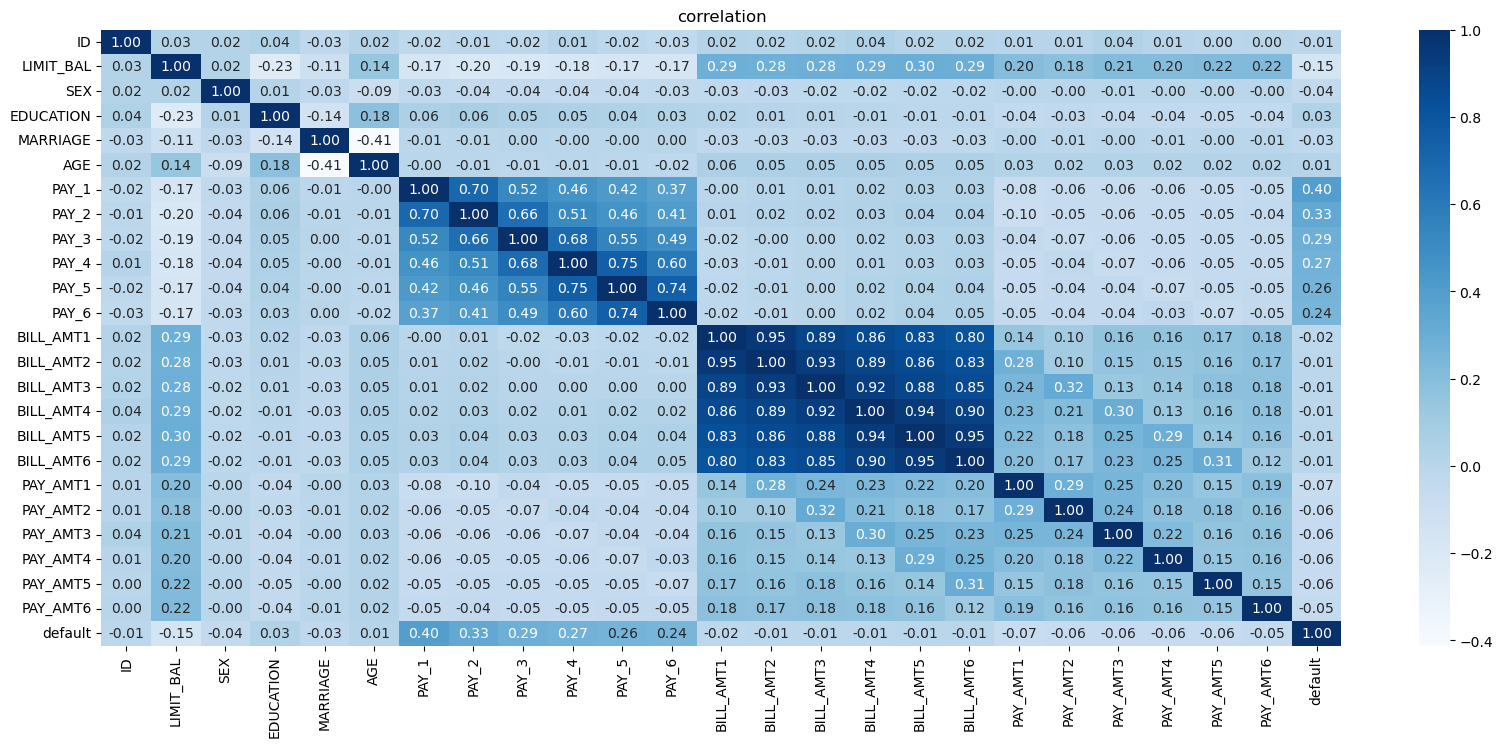

In [41]:
plt.figure(figsize=(20, 8))
sns.heatmap(df1.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('correlation')
plt.show()

- The variables PAY_1 to PAY_6 have the highest positive correlations with "default". The highest correlation is 0.32 for PAY_1. This suggests a moderate positive correlation between these variables and the likelihood of default. It implies that payment delays in the previous months are associated with an increased risk of default.

- The variable LIMIT_BAL has a correlation of 0.15 with "default", which is the highest negative correlation. This indicates a weaker negative correlation. It suggests that there is a slight negative association between the credit limit and the likelihood of default.

- The variables PAY_AMT1 to PAY_AMT6 also have negative correlations with "default". This implies that higher payment amounts in the previous months are associated with a lower risk of default.

- The variables BILL_AMT and PAY_AMT are strongly correlated with each other over the months. Additionally, BILL_AMT shows an even stronger correlation with "default" than PAY_AMT.

In [42]:
cat_col = ['EDUCATION','MARRIAGE', 'SEX' ]

num_col = ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
           'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
          'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5', 'PAY_AMT6']


input_col = ['EDUCATION','MARRIAGE', 'SEX','LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
           'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
          'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5', 'PAY_AMT6']

target_col = ['default']

In [43]:
from sklearn.preprocessing import MinMaxScaler  

In [44]:
scaler = MinMaxScaler()
scaler.fit(df1[num_col])
df1[num_col] = scaler.transform(df1[num_col])

In [45]:
df1[num_col]

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.010101,0.051724,0.250,0.250,0.00,0.0,0.0,0.00,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.086207,0.000,0.250,0.00,0.0,0.0,0.25,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.224138,0.000,0.000,0.00,0.0,0.0,0.00,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.275862,0.000,0.000,0.00,0.0,0.0,0.00,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.620690,0.000,0.000,0.00,0.0,0.0,0.00,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.310345,0.000,0.000,0.00,0.0,0.0,0.00,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892
29996,0.141414,0.379310,0.000,0.000,0.00,0.0,0.0,0.00,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000
29997,0.020202,0.275862,0.500,0.375,0.25,0.0,0.0,0.00,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864
29998,0.070707,0.344828,0.125,0.000,0.00,0.0,0.0,0.00,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412


In [46]:
cat = df1[cat_col]
cat

,EDUCATION,MARRIAGE,SEX
0,2,1,2
1,2,2,2
2,2,2,2
3,2,1,2
4,2,1,1
...,...,...,...
29995,3,1,1
29996,3,2,1
29997,2,2,1
29998,3,1,1


In [47]:
from sklearn.preprocessing import OneHotEncoder   

In [48]:
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
encoder.fit(df1[cat_col])          # fit the model on categorical column
encoded_cols = list(encoder.get_feature_names(cat_col))    # name of give columns
print(encoded_cols)
df1[encoded_cols] = encoder.transform(df1[cat_col])    # transform on only new column so that there no older column

['EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'SEX_1', 'SEX_2']


In [49]:
scaler = MinMaxScaler()
scaler.fit(df1[num_col])
df1[num_col] = scaler.transform(df1[num_col])

In [50]:
df1[num_col]

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.010101,0.051724,0.250,0.250,0.00,0.0,0.0,0.00,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.086207,0.000,0.250,0.00,0.0,0.0,0.25,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.224138,0.000,0.000,0.00,0.0,0.0,0.00,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.275862,0.000,0.000,0.00,0.0,0.0,0.00,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.620690,0.000,0.000,0.00,0.0,0.0,0.00,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.310345,0.000,0.000,0.00,0.0,0.0,0.00,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892
29996,0.141414,0.379310,0.000,0.000,0.00,0.0,0.0,0.00,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000
29997,0.020202,0.275862,0.500,0.375,0.25,0.0,0.0,0.00,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864
29998,0.070707,0.344828,0.125,0.000,0.00,0.0,0.0,0.00,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412


In [51]:
cat = df1[cat_col]
cat

,EDUCATION,MARRIAGE,SEX
0,2,1,2
1,2,2,2
2,2,2,2
3,2,1,2
4,2,1,1
...,...,...,...
29995,3,1,1
29996,3,2,1
29997,2,2,1
29998,3,1,1


In [52]:
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
encoder.fit(df1[cat_col])          # fit the model on categorical column
encoded_cols = list(encoder.get_feature_names(cat_col))    # name of give columns
print(encoded_cols)
df1[encoded_cols] = encoder.transform(df1[cat_col])    # transform on only new column so that there no older column

['EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'SEX_1', 'SEX_2']


In [53]:
df1[encoded_cols]

,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,SEX_1,SEX_2
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
29996,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
29997,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
29998,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [54]:
X = df1[num_col + encoded_cols]
X.drop('EDUCATION_3', axis = 1)

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,EDUCATION_1,EDUCATION_2,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,SEX_1,SEX_2
0,0.010101,0.051724,0.250,0.250,0.00,0.0,0.0,0.00,0.149982,0.069164,...,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.111111,0.086207,0.000,0.250,0.00,0.0,0.0,0.25,0.148892,0.067858,...,0.000000,0.003783,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.080808,0.224138,0.000,0.000,0.00,0.0,0.0,0.00,0.172392,0.079532,...,0.002345,0.009458,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.040404,0.275862,0.000,0.000,0.00,0.0,0.0,0.00,0.188100,0.111995,...,0.002506,0.001892,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.040404,0.620690,0.000,0.000,0.00,0.0,0.0,0.00,0.154144,0.071601,...,0.001615,0.001284,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.310345,0.000,0.000,0.00,0.0,0.0,0.00,0.313716,0.249208,...,0.011723,0.001892,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
29996,0.141414,0.379310,0.000,0.000,0.00,0.0,0.0,0.00,0.148008,0.067955,...,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
29997,0.020202,0.275862,0.500,0.375,0.25,0.0,0.0,0.00,0.149674,0.069405,...,0.004689,0.005864,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
29998,0.070707,0.344828,0.125,0.000,0.00,0.0,0.0,0.00,0.145064,0.140604,...,0.124174,0.003412,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [55]:
# making the target variable
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df1['default']=le.fit_transform(df1['default'])

In [56]:
y= df1['default']
y =y.astype('int')

In [57]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int32

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42 ) 

#### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic = LogisticRegression(random_state = 42)
logistic.fit(X_train,y_train)
y_pred1 = logistic.predict(X_val)
acc_1 = accuracy_score(y_val, y_pred1)
score1 = round(acc_1*100,4)
print('The accuracy score of logistic regression is {}%'.format(score1))

The accuracy score of logistic regression is 81.25%


#### K Nearest Neighbor

In [60]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors = KNeighborsClassifier()
k_neighbors.fit(X_train,y_train)
y_pred2 = k_neighbors.predict(X_val)
acc_2 = accuracy_score(y_val, y_pred2)
score2 = round(acc_2*100,4)
print('The accuracy score of k nearest neighbors is {}%'.format(score2))

The accuracy score of k nearest neighbors is 79.3542%


#### Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)
y_pred3 = naive_bayes.predict(X_val)
acc_3 = accuracy_score(y_val, y_pred3)
score3 = round(acc_3*100,4)
print('The accuracy score Naive bayes is {}%'.format(score3))

The accuracy score Naive bayes is 76.0417%


#### Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred4 = decision_tree.predict(X_val)
acc_4 = accuracy_score(y_val, y_pred4)
score4 = round(acc_4*100,4)
print('The accuracy score of Decision tree is {}%'.format(score4))

The accuracy score of Decision tree is 71.5625%


#### Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state = 42)
random_forest.fit(X_train, y_train)

ye = random_forest.predict(X_train)
print(accuracy_score(y_train, ye))

y_pred5 = random_forest.predict(X_val)
acc_5 = accuracy_score(y_val, y_pred5)
score5 = round(acc_5*100, 4)
print('The accuracy score of random forest is {}%'.format(score5))

0.9994791666666667
The accuracy score of random forest is 80.8125%


#### SVM

In [64]:
from sklearn.svm import SVC
model6 = SVC()
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_val)
acc_6 = accuracy_score(y_val, y_pred6)
score6=round(acc_6*100,4)

print("The accuracy score of SVM is {}%:".format(score6))

The accuracy score of SVM is 81.125%:


In [65]:
data = {'Machine Learning Model':['Logistic Regression','K Nearest Neighbor','Naive Bayes',
                                  'Decision Tree','Random Forest','SVM'],
       'Accuracy Score':[score1,score2,score3,score4,score5,score6]}
      
df_new= pd.DataFrame(data)
df_new

,Machine Learning Model,Accuracy Score
0,Logistic Regression,81.2500
1,K Nearest Neighbor,79.3542
2,Naive Bayes,76.0417
3,Decision Tree,71.5625
4,Random Forest,80.8125
5,SVM,81.1250


#### Logistic Regression gives the highest accuracy and Support Vector gives almost similar accuracy to the Logistic Regression. now lets do some operations to increase further the accuracy.

### Accuracy Comparison 

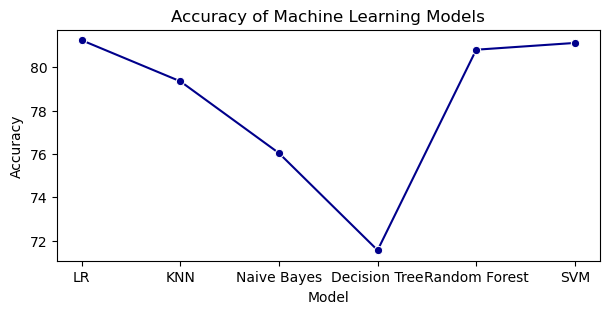

In [123]:
models = ['LR','KNN','Naive Bayes','Decision Tree','Random Forest','SVM']
accuracies = [score1, score2,score3,score4,score5,score6]

plt.figure(figsize=(7,3))
sns.lineplot(x=models, y=accuracies, marker='o', color='darkblue')
plt.title('Accuracy of Machine Learning Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

### Bagging

In [66]:
from sklearn.ensemble import BaggingClassifier

In [67]:
from sklearn.model_selection import cross_val_score

### Logistic Regression

In [68]:
model_bgc = BaggingClassifier(LogisticRegression(),n_estimators=10,random_state=42,oob_score=True)

In [69]:
model_bgc.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(), oob_score=True,
                  random_state=42)

In [70]:
model_bgc.oob_score_

0.8180729166666667

In [71]:
model_bgc_cv = cross_val_score(model_bgc,X,y,cv=5)
model_bgc_cv

array([0.80433333, 0.808     , 0.81966667, 0.8265    , 0.82216667])

In [72]:
accuracy1 =np.average(model_bgc_cv)
score_bg_lr=round(accuracy1*100,4)

print("The accuracy score of Logistic Regression after bagging is {}%:".format(score_bg_lr))

The accuracy score of Logistic Regression after bagging is 81.6133%:


### SVM

In [73]:
model_bgc1 = BaggingClassifier(SVC(),n_estimators=10,random_state=42,oob_score=True)

In [74]:
model_bgc1.fit(X_train,y_train)

BaggingClassifier(base_estimator=SVC(), oob_score=True, random_state=42)

In [75]:
model_bgc1.oob_score_

0.8156770833333333

In [76]:
model_bgc1_cross_val = cross_val_score(model_bgc1,X,y,cv=3)
model_bgc1_cross_val

array([0.8082, 0.8117, 0.8208])

In [77]:
np.average(model_bgc1_cross_val)

0.8135666666666665

In [78]:
accuracy2 =np.average(model_bgc1_cross_val)
score_bg_svm=round(accuracy2*100,4)

print("The accuracy score of SVM after bagging is {}%:".format(score_bg_svm))

The accuracy score of SVM after bagging is 81.3567%:


In [79]:
data1 = {'Bagging':['Logistic Regression','SVM'],
       'Accuracy Score':[score_bg_lr,score_bg_svm]}
      
df_new1= pd.DataFrame(data1)
df_new1

,Bagging,Accuracy Score
0,Logistic Regression,81.6133
1,SVM,81.3567


### After we have applied for both Logistic Regression and SVM we found that Logistic Regression gives the highest accuracy.